In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir('prep/data')

['new_ratings_with_real.csv',
 'population.csv',
 'weather.csv',
 'new_performance.csv',
 'new_rating.xlsx',
 'new_performance_ver3.csv',
 'new_performance_ver2.csv',
 'new_performance_ver4.csv',
 '지역별가중합날씨.csv',
 '월별인구가중합날씨.csv',
 '시청률.xlsx',
 'weather2020.csv']

In [3]:
def drop_unnamed(data):
    names = data.columns
    for name in names:
        if "Unnamed" in name:
            data.pop(name)
    return data

In [4]:
pf = pd.read_csv("prep/data/new_performance_ver4.csv")
pf = drop_unnamed(pf)
pf.head(2)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time,요일,설명,지속휴일수,IsHoliday
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,1,06:00:00,1,새해,1.0,1.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,1,06:00:00,1,새해,1.0,1.0


In [5]:
weather = pd.read_csv("prep/data/월별인구가중합날씨.csv")
weather = drop_unnamed(weather)
weather.head()

,time,TEMP,HUM
0,2019-01-01 01:00,-5.157666,53.621521
1,2019-01-01 02:00,-5.577352,56.876710
2,2019-01-01 03:00,-5.922292,58.845987
3,2019-01-01 04:00,-6.223195,60.195692
4,2019-01-01 05:00,-6.449101,61.929722


In [7]:
from datetime import datetime

In [8]:
weather['date'] = weather['time'].apply(lambda x: datetime.strptime(x,
                                                                   '%Y-%m-%d %H:%M').strftime("%Y-%m-%d"))
weather['hour'] = weather['time'].apply(lambda x: datetime.strptime(x,
                                                                   '%Y-%m-%d %H:%M').strftime("%-H"))
weather['time'] = weather['time'].apply(lambda x: datetime.strptime(x,
                                                                   '%Y-%m-%d %H:%M').strftime("%H:%M:%S"))


weather.head()

,time,TEMP,HUM,date,hour
0,01:00:00,-5.157666,53.621521,2019-01-01,1
1,02:00:00,-5.577352,56.876710,2019-01-01,2
2,03:00:00,-5.922292,58.845987,2019-01-01,3
3,04:00:00,-6.223195,60.195692,2019-01-01,4
4,05:00:00,-6.449101,61.929722,2019-01-01,5


In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13080 entries, 0 to 13079
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    13080 non-null  object 
 1   TEMP    13080 non-null  float64
 2   HUM     13080 non-null  float64
 3   date    13080 non-null  object 
 4   hour    13080 non-null  object 
dtypes: float64(2), object(3)
memory usage: 511.1+ KB


In [10]:


# view = pd.read_excel("prep/data/시청률.xlsx")
# view.columns = view.iloc[0]
# view = view[1:].reset_index(drop = True)
# view = view[241:-1]
# view["시간대"] = view["시간대"].apply(lambda x: datetime.strptime(x, "%H:%M").time())

# view.head()

view = pd.read_excel("prep/data/new_rating.xlsx")
view = drop_unnamed(view)
view.head()

,date,time,rating,month,day,week,hour,minute
0,2019-01-01,06:01:00,0.0,1,1,1,6,1
1,2019-01-01,06:02:00,0.0,1,1,1,6,2
2,2019-01-01,06:03:00,0.0,1,1,1,6,3
3,2019-01-01,06:04:00,0.0,1,1,1,6,4
4,2019-01-01,06:05:00,0.0,1,1,1,6,5


In [11]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437635 entries, 0 to 437634
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    437635 non-null  datetime64[ns]
 1   time    437635 non-null  object        
 2   rating  437635 non-null  float64       
 3   month   437635 non-null  int64         
 4   day     437635 non-null  int64         
 5   week    437635 non-null  int64         
 6   hour    437635 non-null  int64         
 7   minute  437635 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 26.7+ MB


In [12]:
view['date'] = view['date'].astype('U')
view['hour'] = view['hour'].astype('U')

In [13]:
view.head()

,date,time,rating,month,day,week,hour,minute
0,2019-01-01,06:01:00,0.0,1,1,1,6,1
1,2019-01-01,06:02:00,0.0,1,1,1,6,2
2,2019-01-01,06:03:00,0.0,1,1,1,6,3
3,2019-01-01,06:04:00,0.0,1,1,1,6,4
4,2019-01-01,06:05:00,0.0,1,1,1,6,5


## 시청률과 날씨의 관계성

weather, view

In [14]:
import plotly.express as px
import seaborn as sns

In [15]:
data = pd.merge(weather[['TEMP', 'HUM', 'date', 'hour']], view, on = ['date', 'hour'])

In [16]:
data.head()

,TEMP,HUM,date,hour,time,rating,month,day,week,minute
0,-5.157666,53.621521,2019-01-01,1,01:00:00,0.000,1,1,1,0
1,-5.157666,53.621521,2019-01-01,1,01:01:00,0.000,1,1,1,1
2,-5.157666,53.621521,2019-01-01,1,01:02:00,0.034,1,1,1,2
3,-5.157666,53.621521,2019-01-01,1,01:03:00,0.000,1,1,1,3
4,-5.157666,53.621521,2019-01-01,1,01:04:00,0.000,1,1,1,4


<AxesSubplot:>

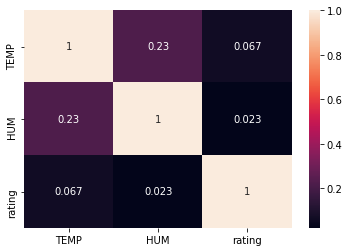

In [18]:
sns.heatmap(data[['TEMP', 'HUM', 'rating']].corr(), annot=True)

In [22]:
data['sub'] = abs(20 - data['TEMP'])
display(data.head())
data.describe()

,TEMP,HUM,date,hour,time,rating,month,day,week,minute,sub
0,-5.157666,53.621521,2019-01-01,1,01:00:00,0.000,1,1,1,0,25.157666
1,-5.157666,53.621521,2019-01-01,1,01:01:00,0.000,1,1,1,1,25.157666
2,-5.157666,53.621521,2019-01-01,1,01:02:00,0.034,1,1,1,2,25.157666
3,-5.157666,53.621521,2019-01-01,1,01:03:00,0.000,1,1,1,3,25.157666
4,-5.157666,53.621521,2019-01-01,1,01:04:00,0.000,1,1,1,4,25.157666


,TEMP,HUM,rating,month,day,week,minute,sub
count,436436.000000,436436.000000,436436.000000,436436.000000,436436.000000,436436.000000,436436.000000,436436.000000
mean,13.900012,62.209049,0.004727,6.512501,15.682696,3.000000,29.524604,9.285904
std,9.748663,18.435407,0.011812,3.440608,8.771898,2.000002,17.304366,6.783669
min,-8.577640,16.928262,0.000000,1.000000,1.000000,0.000000,0.000000,0.002831
25%,5.424781,48.560156,0.000000,4.000000,8.000000,1.000000,15.000000,3.633847
50%,14.686777,63.332886,0.000000,7.000000,16.000000,3.000000,30.000000,7.487515
75%,22.394588,77.208940,0.000000,10.000000,23.000000,5.000000,45.000000,14.575219
max,33.703554,96.144207,0.812000,12.000000,31.000000,6.000000,59.000000,28.577640


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data[['month', 'sub']].groupby(['month']).var()

,sub
month,
1,13.463614
2,19.029587
3,15.580238
4,18.542430
5,6.888382
6,4.644792
7,7.002764
8,9.885999
9,4.327931


In [34]:
fig = px.histogram(data[['month', 'sub']].groupby(['month']).var().reset_index(),
                   x = 'month',
                   bin_size = 1,
                   hover_data = ['month', 'sub'],
                  title = "Histogram of Monthly variation of Temperature")

fig.show()

TypeError: histogram() got an unexpected keyword argument 'bin_size'